In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Classification Algo
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Data CLeaning

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

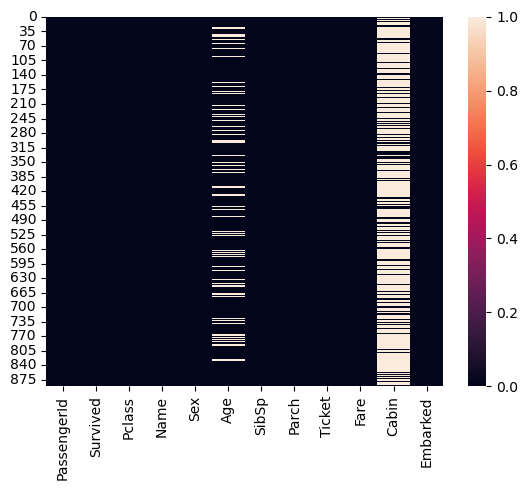

In [4]:
sns.heatmap(data.isnull())

In [5]:
# not requried fare, Cabin, Ticket, Name, PassengerId
# Delete unecessary column
data = data.drop(['PassengerId','Ticket','Fare','Cabin','Name'],axis=1)

In [6]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [7]:
# Data Analysis of Titanic
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


<Axes: xlabel='Survived', ylabel='count'>

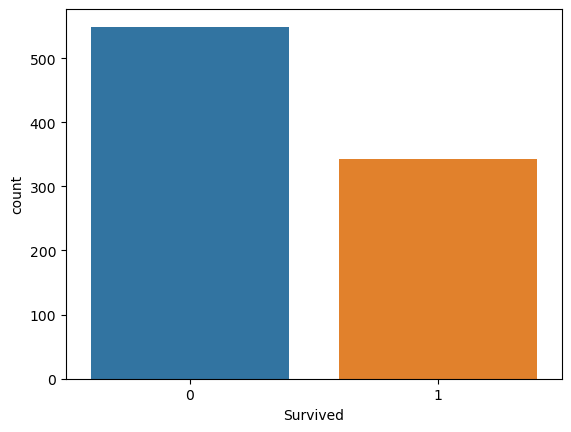

In [8]:
sns.countplot(data = data,x = 'Survived') # Survival check

<Axes: xlabel='Pclass', ylabel='count'>

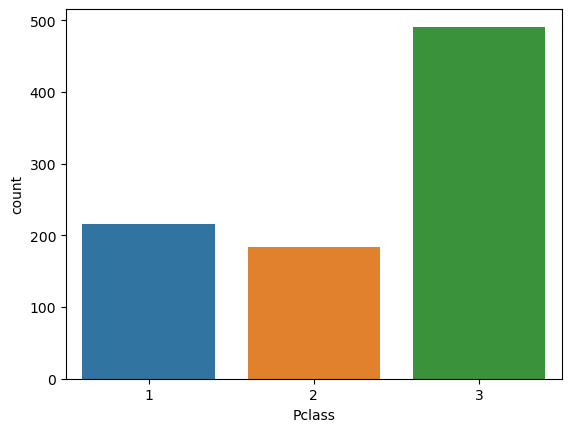

In [9]:
sns.countplot(data = data,x = 'Pclass') # Passenger Travel count on class

<Axes: xlabel='Pclass', ylabel='count'>

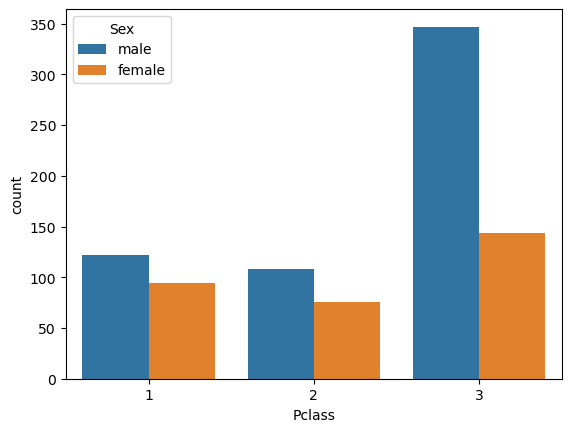

In [10]:
sns.countplot(data = data,x = 'Pclass',hue = 'Sex') # Male & Female count of traveling in each class

<Axes: xlabel='Survived', ylabel='count'>

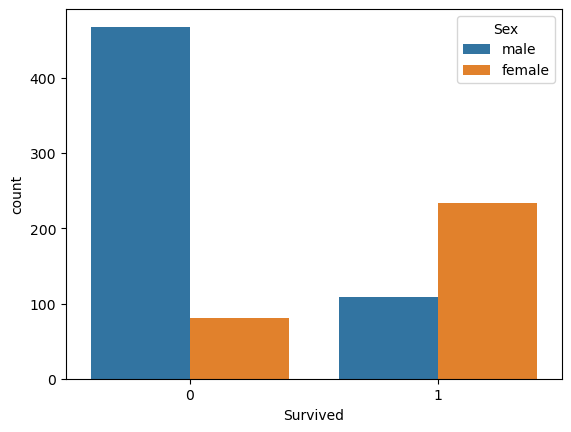

In [11]:
sns.countplot(data = data,x = 'Survived',hue = 'Sex') # rate of survival based on Gender

<Axes: xlabel='Pclass', ylabel='count'>

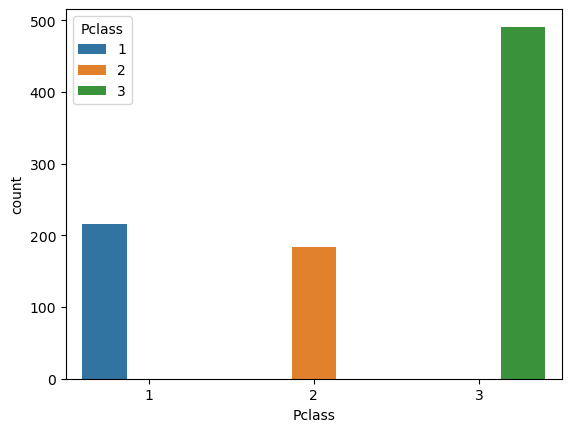

In [12]:
sns.countplot(data = data,x = 'Pclass',hue = 'Pclass') # Which class is best to travel

In [13]:
data[data['Pclass'] == 1]['Age'].mean()

38.233440860215055

In [14]:
data[data['Pclass'] == 2]['Age'].mean()

29.87763005780347

In [15]:
data[data['Pclass'] == 3]['Age'].mean()

25.14061971830986

<Axes: xlabel='Pclass', ylabel='Age'>

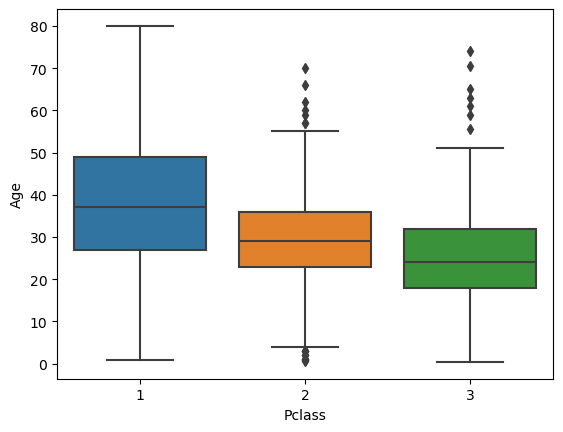

In [16]:
sns.boxplot(data = data,x = 'Pclass',y='Age')

In [17]:
# means 38, 30, 25
def cleanDemo(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 25

    else:
        return age

In [18]:
data['Age'] = data[['Age','Pclass']].apply(cleanDemo,axis = 1)

C:\Users\Kiriti\AppData\Local\Temp\ipykernel_1872\2665706370.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = cols[0]
C:\Users\Kiriti\AppData\Local\Temp\ipykernel_1872\2665706370.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass = cols[1]


In [19]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [20]:
data.dropna(inplace = True) # del the Entire row as the null values are minimal

In [21]:
data.isnull().sum() # data is clean now

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

<Axes: >

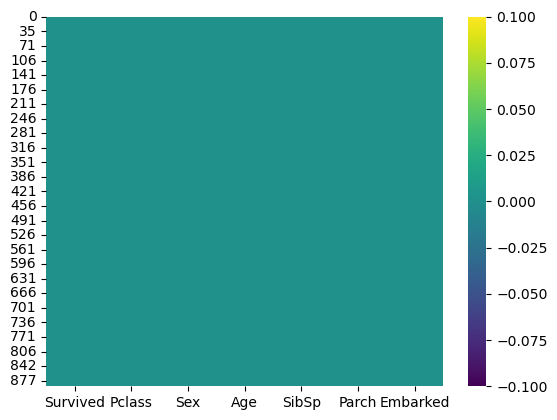

In [22]:
# data Wrangling
sns.heatmap(data.isnull(),cmap = 'viridis') # data is clean

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


In [24]:
gender = pd.get_dummies(data['Sex'], dtype= int, drop_first = True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [25]:
emb = pd.get_dummies(data['Embarked'], dtype = int, drop_first = True)
emb.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
data = data.drop(['Sex','Embarked'], axis = 1)

In [27]:
data = pd.concat([data,gender,emb], axis = 1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   male      889 non-null    int32  
 6   Q         889 non-null    int32  
 7   S         889 non-null    int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 52.1 KB


In [30]:
data.to_csv('titanic.csv',index = False)

In [31]:
import os
os.getcwd()

'C:\\Users\\Kiriti\\Desktop\\College Training'

In [32]:
data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'male', 'Q', 'S'], dtype='object')

In [34]:
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'male', 'Q', 'S']]
y = data['Survived']

In [35]:
from sklearn.model_selection import train_test_split

In [46]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state = 10)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
len(Xtrain)/len(X) * 100

74.9156355455568

In [47]:
model = LogisticRegression()
model.fit(Xtrain,ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [51]:
pr = model.predict(Xtest)

In [52]:
# r2_score --> for regression, silhouette_score --> for clustering , accuracy_score --> clasification
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(ytest,pr) * 100

80.26905829596413

In [54]:
# convert ur model to pickle
import pickle

In [55]:
filename = 'dokku.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [61]:
# load the pickle for future uses like using it in streamlit
  
import pickle
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

# Define the filename of your pickled model
filename = 'dokku.pkl'

# Open the file in binary read mode ('rb') and load the model
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

print(f"Model loaded from {filename}")
# predictions = loaded_model.predict(X_new)
# print(f"Predictions with loaded model: {predictions}")

Model loaded from dokku.pkl


In [62]:
# Load dataset
url = "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/refs/heads/master/diabetes.csv"
data = pd.read_csv(url)

# Prepare data
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Save model with pickle
with open('diabetes_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model training completed and saved as diabetes_model.pkl")

Model training completed and saved as diabetes_model.pkl


In [23]:
# pracitice

wine = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

<Axes: >

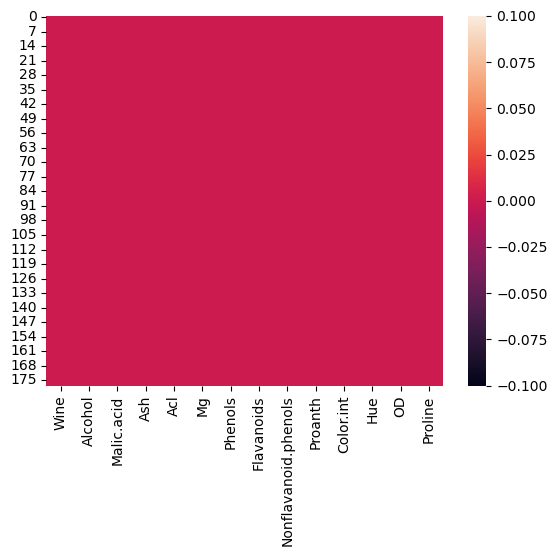

In [5]:
sns.heatmap(wine.isnull())

In [10]:
wine.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


<Axes: xlabel='Alcohol', ylabel='count'>

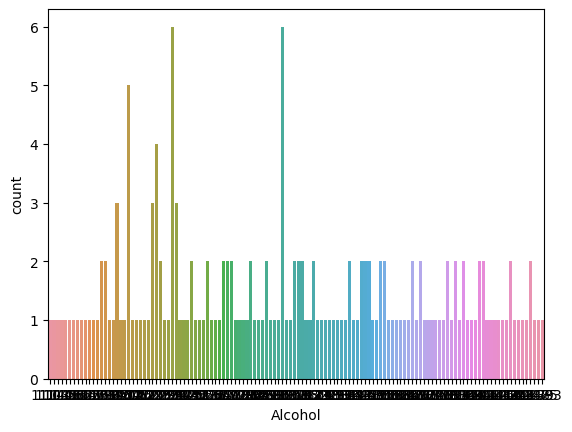

In [15]:
sns.countplot(data = wine,x = 'Alcohol')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
y = wine['Wine']
X = wine.drop(['Wine'],axis = 1)

In [27]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state = 40)

In [33]:
winemodel = LogisticRegression()
winemodel.fit(Xtrain,ytrain)

C:\Users\Kiriti\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [35]:
print(winemodel.predict(Xtest))
ytest

[2 1 1 3 3 2 1 2 2 1 2 3 1 2 2 3 3 1 2 1 3 1 2 1 3 3 1 3 2 2 1 1 3 2 3 3 2
 2 2 2 3 3 3 3 2]


127    2
5      1
52     1
145    3
162    3
69     2
23     1
115    2
126    2
26     1
125    2
156    3
28     1
81     2
120    2
152    3
146    3
35     1
112    2
54     1
168    3
42     1
64     2
18     1
171    3
161    3
46     1
134    3
142    3
75     2
11     1
37     1
137    3
100    2
164    3
147    3
85     2
65     2
59     2
130    3
151    3
153    3
150    3
157    3
24     1
Name: Wine, dtype: int64

In [47]:
bank = pd.read_csv('bank.csv')

In [48]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [49]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<Axes: >

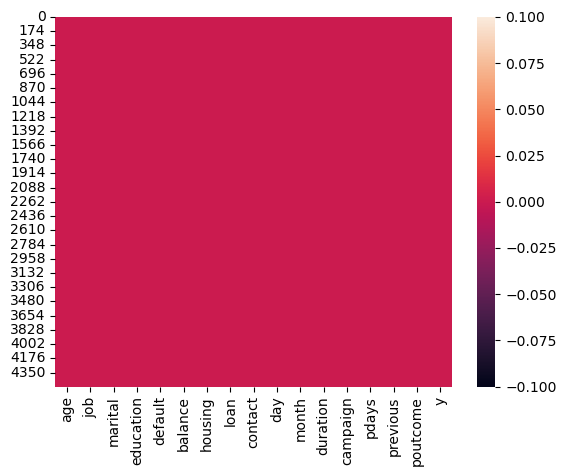

In [51]:
sns.heatmap(bank.isnull())

In [53]:
marital = pd.get_dummies(bank['marital'], dtype= int, drop_first = True)
marital.head()

,married,single
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [59]:
job = pd.get_dummies(bank['job'], dtype= int, drop_first = True)
job.head()
bank['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [61]:
bank['contact'].value_counts()

contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64